In [6]:
pip install numpy pandas matplotlib seaborn scikit-learn


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/28/ba/8be09886eb56ac04a218a1dc3fa728a5c4cac60b019b4f1687885166da00/matplotlib-3.9.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/7d/d7/fb80c63062b60b1fa5dcb2d4dd3a4e83bd8c68cdc83cf6ff8c016228f184/scikit_learn-1.5.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/9f/6b/8a1ca4b81d426c104fe42b3cfad9488eaaef0a03fcf98eaecc22b628a013/contourpy-1.2.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f594

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


Import clean dataset

In [9]:
clean_df = pd.read_csv('clean_resume_data.csv')
clean_df.shape

(2484, 3)

Data Analysis

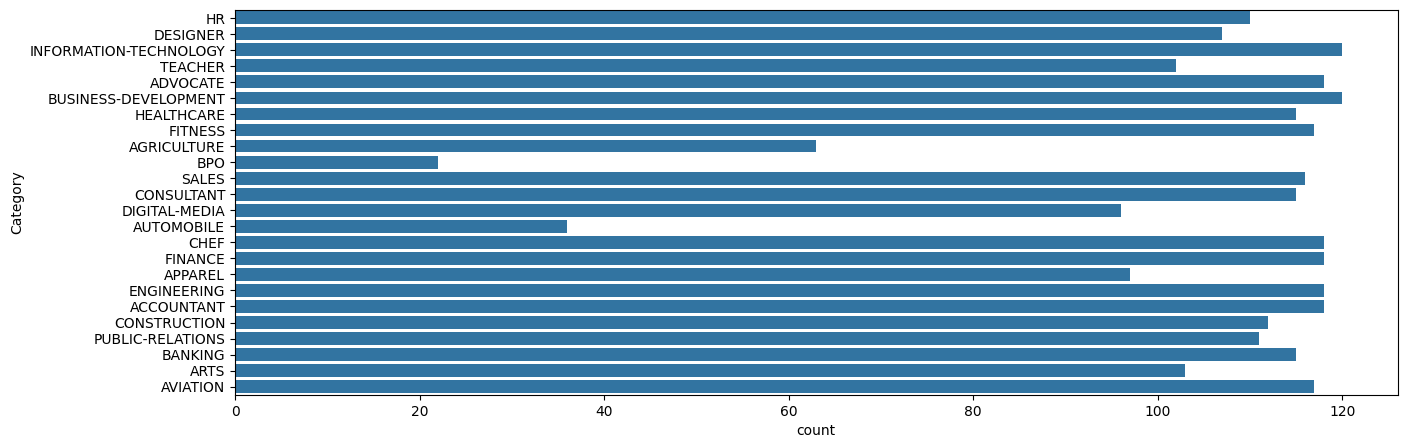

In [11]:
plt.figure(figsize=(15, 5))
sns.countplot(clean_df['Category'])
plt.show()

([<matplotlib.patches.Wedge at 0x142598b50>,
 [Text(1.0873558985304643, 0.16630438939188294, 'HR'),
  Text(0.9879404766659289, 0.483708191542274, 'DESIGNER'),
  Text(0.8001110148396715, 0.754865792000294, 'INFORMATION-TECHNOLOGY'),
  Text(0.5427552970145121, 0.9567741047722231, 'TEACHER'),
  Text(0.2374045338432916, 1.0740759225076455, 'ADVOCATE'),
  Text(-0.08893988033794423, 1.0963985122597861, 'BUSINESS-DEVELOPMENT'),
  Text(-0.40741943831722166, 1.0217677824639413, 'HEALTHCARE'),
  Text(-0.6887871215943964, 0.8576551178216723, 'FITNESS'),
  Text(-0.9089746228635491, 0.6194878005175476, 'AGRICULTURE'),
  Text(-1.0497142428046182, 0.3287856573105451, 'BPO'),
  Text(-1.099928739161177, 0.012520733497043118, 'SALES'),
  Text(-1.0573112973650307, -0.3034679891920658, 'CONSULTANT'),
  Text(-0.9258571907028171, -0.593959983857404, 'DIGITAL-MEDIA'),
  Text(-0.7197732137004842, -0.8318212072550671, 'AUTOMOBILE'),
  Text(-0.45983078365386687, -0.9992775642454258, 'CHEF'),
  Text(-0.166304862

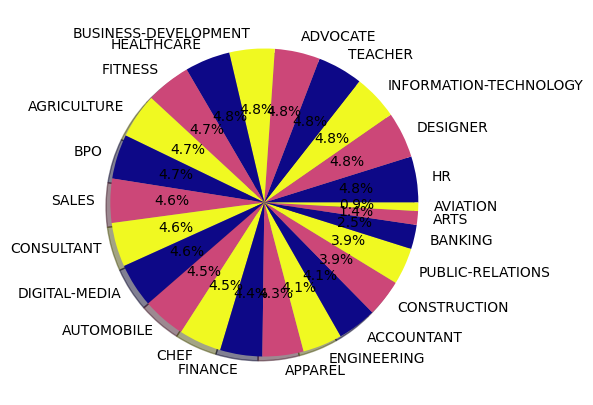

In [12]:
counts = clean_df['Category'].value_counts()
labels = clean_df['Category'].unique()
plt.figure(figsize=(15,5))
plt.pie(counts,labels=labels,autopct='%1.1f%%', shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))

Balance Dataset

In [20]:
from sklearn.utils import resample

# Get the maximum value of the value_counts of the 'Category' column
max_count = clean_df['Category'].value_counts().max()

# Resample each category to match maximum count
balanced_data = []

for category in clean_df['Category'].unique():
    category_data = clean_df[clean_df['Category'] == category]
    
    if len(category_data) < max_count:
        # Oversample with replacement if the category has fewer samples than max_count
        balanced_category_data = resample(category_data, replace=True, n_samples=max_count, random_state=42)
    elif len(category_data) > max_count:
        # Undersample without replacement if the category has more samples than max_count
        balanced_category_data = resample(category_data, replace=False, n_samples=max_count, random_state=42)
    else:
        # If the category has exactly max_count samples, use it as is
        balanced_category_data = category_data
    
    balanced_data.append(balanced_category_data)

# Concatenate all balanced categories into a single DataFrame
balanced_df = pd.concat(balanced_data)

In [22]:
for category in clean_df['Category'].unique():
    print(category)

HR
DESIGNER
INFORMATION-TECHNOLOGY
TEACHER
ADVOCATE
BUSINESS-DEVELOPMENT
HEALTHCARE
FITNESS
AGRICULTURE
BPO
SALES
CONSULTANT
DIGITAL-MEDIA
AUTOMOBILE
CHEF
FINANCE
APPAREL
ENGINEERING
ACCOUNTANT
CONSTRUCTION
PUBLIC-RELATIONS
BANKING
ARTS
AVIATION
